<hr/>

# EDA - Top Tech Companies Stock Price Dataset
### **[by Tomas Mantero](https://www.kaggle.com/tomasmantero)**
<hr/>

### Table of Contents
* **1. [Introduction](#ch1)**
* **2. [Data preparation](#ch2)**
    * 2.1 Load Data
    * 2.2 Check Features
    * 2.3 Clean Dataframes
    * 2.4 Concatenate The Stock Dataframes
* **3. [Exploratory Data Analysis](#ch3)**
    * 3.1 Sunburst Charts - Sectors of S&P500
    * 3.2 New Return Dataframes
    * 3.3 Standard Deviation
    * 3.4 Stocks Pearson Correlation Matrix
* **4. [Financial Charts](#ch4)**
    * 4.1 Line Charts
    * 4.2 Histograms Charts
    * 4.3 Moving Averages Charts
    * 4.4 Candlestick Charts
    * 4.5 Bollinger Band Charts
    * 4.6 OHLC Charts
* **5. [Predictions and Conclusion](#ch5)**
    * 5.1 Investment Recommendations
* **6. [References](#ch6)**

<a id="ch1"></a>
# 1. Introduction
---
In this notebook we will be analyzing companies from the technology sector. We will analyze their behaviors over the past few years, as well as their behaviors during the COVID-19 Pandemic.

We will try to determine new trends that can help investors make more informed decisions.

This Notebook follows four main parts:

* The data preparation
* The exploratory data analysis
* The financial charts
* The Predictions and Conclusions

<img src="https://s27389.pcdn.co/wp-content/uploads/2019/12/global-software-sector-ma-deals.jpeg" width="500" height="500"/>
<br>

<a id="ch2"></a>
# 2. Data preparation
---

### Imports

In [1]:
# data analysis and wrangling
import pandas as pd
from pandas_datareader import data
import numpy as np
import random as rnd
import datetime

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()

# web scraping
import requests
import bs4
import csv
import json 
import re
from io import StringIO

## 2.1 Load Data
There are two ways to load the data. The first is to simply read the csv files. The second is to use pandas dataerder which allows you to read stock information directly from the internet. In this case we will use Yahoo Finance. 

**Documentation: [Remote Data Access](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)**

In [2]:
# set the start date and end date
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2020,11,20)

# Technology Companies
stock_list = ['AAPL','MSFT','TSM','NVDA','CRM','ADBE','INTC','ASML','CSCO','ORCL','QCOM','AVGO','ACN','TXN','SAP','SHOP','SNE',
'IBM','AMD','NOW','SQ','FIS','INTU','UBER','SNOW','FISV','AMAT','MU','INFY','LRCX','VMW','ADSK','TEAM','DELL','ADI','WDAY',
'NXPI','CTSH','ERIC','DOCU','PLTR','KLAC','APH','TEL','U','MCHP','STM','SNPS','XLNX','CRWD','SPLK','CDNS','MRVL','OKTA',
'HPQ','MSI','PANW','GLW','DDOG','FTV-PA','ANSS','WIT','RNG','FTV','PAYC','SWKS','COUP','VRSN','STNE','GRMN','MXIM','KEYS','FLT',
'NET','ANET','CAJ','ZBRA','ZS','FTNT','EPAM','CDW','GIB','TER','SSNC','ZI','UMC','WORK','BR','HUBS','QRVO','CHKP','AKAM','TYL',
'CCC','UI','ZEN','CTXS','TRMB','AVLR','STX']

d = {}
for name in stock_list:
    d[name] = data.DataReader("{}".format(name), 'yahoo', start, end)

In [32]:
# Indices
DJI = pd.read_csv('C:/Users/Tomas/Desktop/Carpetas/Programación/Kaggle/Dataset Top Tech Companies Stock Price/Indices/DJI.csv')
GSPC = pd.read_csv('C:/Users/Tomas/Desktop/Carpetas/Programación/Kaggle/Dataset Top Tech Companies Stock Price/Indices/GSPC.csv')
IXIC = pd.read_csv('C:/Users/Tomas/Desktop/Carpetas/Programación/Kaggle/Dataset Top Tech Companies Stock Price/Indices/IXIC.csv')
W5000 = pd.read_csv('C:/Users/Tomas/Desktop/Carpetas/Programación/Kaggle/Dataset Top Tech Companies Stock Price/Indices/W5000.csv')
XLK = pd.read_csv('C:/Users/Tomas/Desktop/Carpetas/Programación/Kaggle/Dataset Top Tech Companies Stock Price/Indices/XLK.csv')

# Lists
list_syp = pd.read_csv('C:/Users/Tomas/Desktop/Carpetas/Programación/Kaggle/Dataset Top Tech Companies Stock Price/List of S&P 500 companies.csv')
technology_list = pd.read_csv('C:/Users/Tomas/Desktop/Carpetas/Programación/Kaggle/Dataset Top Tech Companies Stock Price/Technology Sector List.csv')

## 2.2 Check Features 
First, check the data frames features to see if there is any problem in the data load.

***List of S&P 500 companies***

- **Symbol:** Ticker symbol of the company.
- **Name:** Name of the company.
- **Sector:** The sector to which the company belongs.

In [33]:
list_syp.head(10)

Symbol                        Name                  Sector
0    MMM                  3M Company             Industrials
1    AOS             A.O. Smith Corp             Industrials
2    ABT         Abbott Laboratories             Health Care
3   ABBV                 AbbVie Inc.             Health Care
4   ABMD                 ABIOMED Inc             Health Care
5    ACN               Accenture plc  Information Technology
6   ATVI         Activision Blizzard  Communication Services
7   ADBE                  Adobe Inc.  Information Technology
8    AAP          Advance Auto Parts  Consumer Discretionary
9    AMD  Advanced Micro Devices Inc  Information Technology

***Technology Sector Companies List***

- **Symbol:** Ticker symbol of the company.
- **Name:** Name of the company.
- **Price:** Current price at which a stock can be purchased or sold. (11/24/20)
- **Change:** Net change is the difference between closing prices from one day to the next.
- **% Change:** Is the difference between closing prices from one day to the next in percentage.
- **Volume:** Is the number of shares that changed hands during a given day.
- **Avg Vol:** Is the daily average of the cumulative trading volume during the last three months.
- **Market Cap (Billions):** Is the total value of a company’s shares outstanding at a given moment in time. It is calculated by multiplying the number of shares outstanding by the price of a single share.
- **PE Ratio:** Is the ratio of a company's share (stock) price to the company's earnings per share. The ratio is used for valuing companies and to find out whether they are overvalued or undervalued.

In [34]:
technology_list.head(10)

Symbol                                               Name   Price  Change  \
0   AAPL                                         Apple Inc.  113.85   -3.49   
1   MSFT                              Microsoft Corporation  210.11   -0.28   
2    TSM  Taiwan Semiconductor Manufacturing Company Lim...   98.13    2.80   
3   NVDA                                 NVIDIA Corporation  525.60    2.09   
4    CRM                                salesforce.com inc.  257.64   -0.40   
5   ADBE                                         Adobe Inc.  460.61   -2.31   
6   INTC                                  Intel Corporation   46.06    0.67   
7   ASML                                  ASML Holding N.V.  427.15    3.56   
8   CSCO                                 Cisco Systems Inc.   41.64    0.67   
9   ORCL                                 Oracle Corporation   56.08    0.38   

   % Change     Volume    Avg Vol  Market Cap (Billions)  PE Ratio  
0   -0.0297  127959000  150549000               1936.000     34.71  
1   -0.0013   25684000   31868000               1589.000     33.89  
2    0.0294    8610000    8620000                451.466     44.00  
3    0.0040    9034000   12642000                325.346     85.92  
4   -0.0016    5382000    7842000                234.452     99.44  
5   -0.0050    2371000    3047000                220.963     58.01  
6    0.0148   30126000   33550000                188.754      9.02  
7    0.0084     598982     785747                177.354     61.38  
8    0.0164   19657000   24920000                175.950     16.86  
9    0.0068    8236000   12984000                168.851     17.64

In [40]:
technology_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Symbol                 100 non-null    object 
 1   Name                   100 non-null    object 
 2   Price                  100 non-null    float64
 3   Change                 100 non-null    float64
 4   % Change               100 non-null    float64
 5   Volume                 100 non-null    int64  
 6   Avg Vol                100 non-null    int64  
 7   Market Cap (Billions)  100 non-null    float64
 8   PE Ratio               74 non-null     float64
dtypes: float64(5), int64(2), object(2)
memory usage: 7.2+ KB


***Stocks and Indices***

Every stock and index file has the same structure with the same columns: 
-	**Date:** It is the date on which the prices were recorded.
-	**High:** Is the highest price at which a stock traded during the course of the trading day.
-	**Low:** Is the lowest price at which a stock traded during the course of the trading day.
-	**Open:** Is the price at which a stock started trading when the opening bell rang.
-	**Close:** Is the last price at which a stock trades during a regular trading session.
-	**Volume:** Is the number of shares that changed hands during a given day.
- **Adj Close:** The adjusted closing price factors in corporate actions, such as stock splits, dividends, and rights offerings.

<img src="https://analyzingalpha.com/assets/images/posts/2020-04-17-bar-chart-ohlc.png" alt="Bar Chart OHLC" width="300" height="300"/>

In [36]:
# Notice that the Date column is not the index. We want to change that and make it our index. 
DJI.head()

Date          High           Low          Open         Close  \
0  2006-01-03  10862.780273  10684.450195  10718.299805  10847.410156   
1  2006-01-04  10892.639648  10833.900391  10843.969727  10880.150391   
2  2006-01-05  10908.250000  10843.650391  10880.389648  10882.150391   
3  2006-01-06  10968.839844  10875.450195  10875.450195  10959.309570   
4  2006-01-09  11020.150391  10944.429688  10959.469727  11011.900391   

      Volume     Adj Close  
0  302950000  10847.410156  
1  271490000  10880.150391  
2  250910000  10882.150391  
3  291740000  10959.309570  
4  248240000  11011.900391

In [37]:
d['AAPL'].head()

High       Low      Open     Close       Volume  Adj Close
Date                                                                      
2006-01-03  2.669643  2.580357  2.585000  2.669643  807234400.0   2.284267
2006-01-04  2.713571  2.660714  2.683214  2.677500  619603600.0   2.290990
2006-01-05  2.675000  2.633929  2.672500  2.656429  449422400.0   2.272961
2006-01-06  2.739286  2.662500  2.687500  2.725000  704457600.0   2.331634
2006-01-09  2.757143  2.705000  2.740357  2.716071  675040800.0   2.323994

## 2.3 Clean Dataframes
Since the dataframe `technology_list` is allready clean we don't need to do anything. Originally the Volume and Market Cap columns were in string format with M and B as Million and Billion, but we clean it before uploiding it to the Dataset. 

The only thing we need to do is change the Date columns from the indeces to Index. 

In [44]:
# Set Date Column as Index
DJI.set_index('Date', inplace=True)
GSPC.set_index('Date', inplace=True)
IXIC.set_index('Date', inplace=True)
W5000.set_index('Date', inplace=True)
XLK.set_index('Date', inplace=True)

## 2.4 Concatenate The Stock Dataframes
We are going to concatenate the stock dataframes together to a single data frame called `tech_stocks`. This will help us to have better control over the dataframes and it will allow us to analyze it together.

We will also create an aditional dataframe called `top_indices` with DJI, GSPC, IXIC, W5000 and XLK.

Let's create a list of the ticker symbols.

In [50]:
# We can get the list of stock from the dictionary keys. 
print(d.keys())

dict_keys(['AAPL', 'MSFT', 'TSM', 'NVDA', 'CRM', 'ADBE', 'INTC', 'ASML', 'CSCO', 'ORCL', 'QCOM', 'AVGO', 'ACN', 'TXN', 'SAP', 'SHOP', 'SNE', 'IBM', 'AMD', 'NOW', 'SQ', 'FIS', 'INTU', 'UBER', 'SNOW', 'FISV', 'AMAT', 'MU', 'INFY', 'LRCX', 'VMW', 'ADSK', 'TEAM', 'DELL', 'ADI', 'WDAY', 'NXPI', 'CTSH', 'ERIC', 'DOCU', 'PLTR', 'KLAC', 'APH', 'TEL', 'U', 'MCHP', 'STM', 'SNPS', 'XLNX', 'CRWD', 'SPLK', 'CDNS', 'MRVL', 'OKTA', 'HPQ', 'MSI', 'PANW', 'GLW', 'DDOG', 'FTV-PA', 'ANSS', 'WIT', 'RNG', 'FTV', 'PAYC', 'SWKS', 'COUP', 'VRSN', 'STNE', 'GRMN', 'MXIM', 'KEYS', 'FLT', 'NET', 'ANET', 'CAJ', 'ZBRA', 'ZS', 'FTNT', 'EPAM', 'CDW', 'GIB', 'TER', 'SSNC', 'ZI', 'UMC', 'WORK', 'BR', 'HUBS', 'QRVO', 'CHKP', 'AKAM', 'TYL', 'CCC', 'UI', 'ZEN', 'CTXS', 'TRMB', 'AVLR', 'STX'])


In [48]:
# Tickers
tickers = ['AAPL','MSFT','TSM','NVDA','CRM','ADBE','INTC','ASML','CSCO','ORCL','QCOM','AVGO','ACN','TXN','SAP','SHOP','SNE',
'IBM','AMD','NOW','SQ','FIS','INTU','UBER','SNOW','FISV','AMAT','MU','INFY','LRCX','VMW','ADSK','TEAM','DELL','ADI','WDAY',
'NXPI','CTSH','ERIC','DOCU','PLTR','KLAC','APH','TEL','U','MCHP','STM','SNPS','XLNX','CRWD','SPLK','CDNS','MRVL','OKTA',
'HPQ','MSI','PANW','GLW','DDOG','FTV-PA','ANSS','WIT','RNG','FTV','PAYC','SWKS','COUP','VRSN','STNE','GRMN','MXIM','KEYS','FLT',
'NET','ANET','CAJ','ZBRA','ZS','FTNT','EPAM','CDW','GIB','TER','SSNC','ZI','UMC','WORK','BR','HUBS','QRVO','CHKP','AKAM','TYL',
'CCC','UI','ZEN','CTXS','TRMB','AVLR','STX']

tickers2 = ['DJI','GSPC','IXIC','W5000','XLK']

# New Dataframes
tech_stocks = pd.concat(d.values(), axis=1, keys=tickers)
top_indices = pd.concat([DJI,GSPC,IXIC,W5000,XLK], axis=1, keys=tickers2)

# Set the column name levels
tech_stocks.columns.names = ['Stock Ticker','Stock Info']
top_indices.columns.names = ['Stock Ticker','Stock Info']

In [58]:
tech_stocks.head()

Stock Ticker      AAPL                                                       \
Stock Info        High       Low      Open     Close       Volume Adj Close   
Date                                                                          
2006-01-03    2.669643  2.580357  2.585000  2.669643  807234400.0  2.284267   
2006-01-04    2.713571  2.660714  2.683214  2.677500  619603600.0  2.290990   
2006-01-05    2.675000  2.633929  2.672500  2.656429  449422400.0  2.272961   
2006-01-06    2.739286  2.662500  2.687500  2.725000  704457600.0  2.331634   
2006-01-09    2.757143  2.705000  2.740357  2.716071  675040800.0  2.323994   

Stock Ticker       MSFT                               ... AVLR               \
Stock Info         High    Low       Open      Close  ... Open Close Volume   
Date                                                  ...                     
2006-01-03    27.000000  26.10  26.250000  26.840000  ...  NaN   NaN    NaN   
2006-01-04    27.080000  26.77  26.770000  26.969999  ...  NaN   NaN    NaN   
2006-01-05    27.129999  26.91  26.959999  26.990000  ...  NaN   NaN    NaN   
2006-01-06    27.000000  26.49  26.889999  26.910000  ...  NaN   NaN    NaN   
2006-01-09    27.070000  26.76  26.930000  26.860001  ...  NaN   NaN    NaN   

Stock Ticker                  STX                                           \
Stock Info   Adj Close       High        Low   Open      Close      Volume   
Date                                                                         
2006-01-03         NaN  20.129999  19.690001  20.10  20.070000   8194000.0   
2006-01-04         NaN  21.120001  20.200001  20.24  21.040001  12653000.0   
2006-01-05         NaN  21.120001  20.850000  21.01  20.850000   9026600.0   
2006-01-06         NaN  21.450001  20.879999  21.08  21.389999   9870500.0   
2006-01-09         NaN  22.350000  21.450001  21.52  22.290001   9621700.0   

Stock Ticker             
Stock Info    Adj Close  
Date                     
2006-01-03    11.385056  
2006-01-04    11.935305  
2006-01-05    11.827526  
2006-01-06    12.133849  
2006-01-09    12.644396  

[5 rows x 600 columns]

In [59]:
top_indices.head()

Stock Ticker           DJI                                            \
Stock Info            High           Low          Open         Close   
2006-01-03    10862.780273  10684.450195  10718.299805  10847.410156   
2006-01-04    10892.639648  10833.900391  10843.969727  10880.150391   
2006-01-05    10908.250000  10843.650391  10880.389648  10882.150391   
2006-01-06    10968.839844  10875.450195  10875.450195  10959.309570   
2006-01-09    11020.150391  10944.429688  10959.469727  11011.900391   

Stock Ticker                                  GSPC                            \
Stock Info       Volume     Adj Close         High          Low         Open   
2006-01-03    302950000  10847.410156  1270.219971  1245.739990  1248.290039   
2006-01-04    271490000  10880.150391  1275.369995  1267.739990  1268.800049   
2006-01-05    250910000  10882.150391  1276.910034  1270.300049  1273.459961   
2006-01-06    291740000  10959.309570  1286.089966  1273.479980  1273.479980   
2006-01-09    248240000  11011.900391  1290.780029  1284.819946  1285.449951   

Stock Ticker               ...         W5000                       \
Stock Info          Close  ...          Open         Close Volume   
2006-01-03    1268.800049  ...  12713.879883  12713.879883    0.0   
2006-01-04    1273.459961  ...  12773.490234  12773.490234    0.0   
2006-01-05    1273.479980  ...  12779.820312  12779.820312    0.0   
2006-01-06    1285.449951  ...  12901.690430  12901.690430    0.0   
2006-01-09    1290.150024  ...  12963.000000  12963.000000    0.0   

Stock Ticker                      XLK                                   \
Stock Info       Adj Close       High        Low       Open      Close   
2006-01-03    12713.879883  21.350000  20.840000  21.000000  21.309999   
2006-01-04    12773.490234  21.559999  21.309999  21.350000  21.559999   
2006-01-05    12779.820312  21.690001  21.469999  21.469999  21.660000   
2006-01-06    12901.690430  22.020000  21.740000  21.799999  22.000000   
2006-01-09    12963.000000  22.090000  21.920000  22.020000  22.070000   

Stock Ticker                        
Stock Info       Volume  Adj Close  
2006-01-03    2708300.0  17.157997  
2006-01-04    2729600.0  17.359285  
2006-01-05    1282200.0  17.439810  
2006-01-06    4508700.0  17.713560  
2006-01-09    2458300.0  17.769913  

[5 rows x 30 columns]

<a id="ch3"></a>
# 3. Exploratory Data Analysis
---

[Exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) is an approach to analyze data sets to summarize their main characteristics, often with visual methods. In this case we are going to visualize and analyze the historical data of these stocks and try to find relevant information.

I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html), since we will be using it a lot.

## 3.1 Sunburst Charts - Sectors of S&P500

### Sunburst Chart - Number of Companies per Sector
The sunburst chart is ideal for displaying hierarchical data. Sunburst plots visualize hierarchical data spanning outwards radially from root to leaves. The root starts from the center and children are added to the outer rings.

The chart describe the relationship between 'Sector' and 'Stock'. You can click on the 'Sector' in the chart below to expand or contract it. 

* The Industrial Sector is the biggest in the S&P500. It includes 73 companies.
* The Information Technology Sector comes in second place with 71 companies. 
* Financials and Health Care comes in third and fourth place respectively.
* Energy and Communication Services are the smallest sectors in the list.
* It should be noted that we are talking about the number of companies per sector. We are not talking about the value of companies.

[Sunburst Charts in Python](https://plotly.com/python/sunburst-charts/)

In [62]:
fig = px.sunburst(list_syp, path=['Sector','Symbol'], height=800)
fig.update_layout(title={
    'text': "Number of Companies per Sector",
    'y':0.97,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    showlegend=False)
fig.show()

To determine the percentage of each sector we simply need to use `value_counts()` and then divided it by `count()`. 

In [78]:
sectors = pd.DataFrame((list_syp['Sector'].value_counts() / list_syp['Sector'].count())*100)
sectors.style.background_gradient(cmap='Blues')

## 3.2 Pie Chart - Market Capitalization

### Pie Chart - Market Capitalization in Billions per Company of Top 100 Tech Stocks

The top 5 Market Capitalization are:
* Apple
* Microsoft
* Taiwan Semiconductor Mfg.
* NVIDIA
* Salesforce.com

In [86]:
fig = go.Figure()
fig.add_trace(go.Pie(values=technology_list['Market Cap (Billions)'],labels=technology_list['Symbol'], hole=.35, pull=[0.1, 0, 0, 0, 0]))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(height=800)
fig.show()

## 3.3 Bar Chart - PE Ratio

### Bar Chart - PE Ratio per Company of Top 10 Tech Stocks

The price-earnings ratio (P/E ratio) relates a company's share price to its earnings per share. A high P/E ratio could mean that a company's stock is over-valued, or else that investors are expecting high growth rates in the future. Companies that have no earnings or that are losing money do not have a P/E ratio since there is nothing to put in the denominator.

* Fortive Corporation (FTV-PA) has the highest PE Ratio with 667. Fortive Corporation designs, develops, manufactures, markets, and services professional and engineered products, software, and services worldwide.
* In second place is Shopify with 605. This means that an investor is willing to pay a price 605 times the share of the company's profit. 
* In third place is StoneCo with 386. 

[P/E ratio](https://www.investopedia.com/terms/p/price-earningsratio.asp)

In [91]:
order_PE_ratio = technology_list[['Symbol', 'PE Ratio']].sort_values('PE Ratio', ascending=False).head(10)

figure = px.bar(order_PE_ratio, y=order_PE_ratio['Symbol'], x=order_PE_ratio['PE Ratio'], color='Symbol', 
                title='Bar Chart - PE Ratio per Company of Top 100 Tech Stocks')
figure.update_layout(showlegend=False)
figure.show()

### Table - Top 10 Company Volume

* Volume is the number of shares that changed hands during a given day for a particular stock.
* Apple is the most traded company in the Tech Sector. 
* In second place is Palantir Technologies and in third place is Advanced Micro Devices.

In [98]:
volume_order = technology_list[['Name', 'Volume']].sort_values('Volume', ascending=False).head(10)
volume_order.style.background_gradient(cmap='Greens').hide_index()

## 3.4 New Return Dataframes

### Daily Returns DataFrame
Now we are going to create a new empty DataFrame called returns. This dataframe will contain the returns for each stock. 

Returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

We can use pandas `pct_change()` method on the Close column to create a column representing this return value. Then we can create a for loop and for each Stock Ticker creates a returns column and set's it as a column in the returns DataFrame.

Our first value has NaN because you can not get a percent return on the very first day because there is nothing in the past to compare it to.

In [99]:
returns = pd.DataFrame()

for tick in tickers:
    returns[tick + ' Return'] = tech_stocks[tick]['Adj Close'].pct_change()
    
for tick in tickers2:
    returns[tick + ' Return'] = top_indices[tick]['Adj Close'].pct_change()

<AxesSubplot:xlabel='Date'>

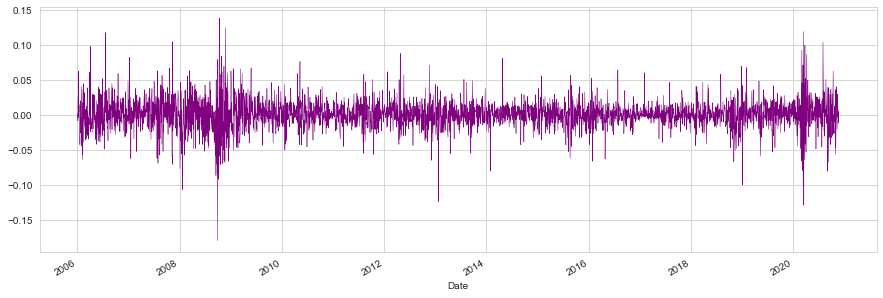

In [126]:
# Visualize one stock of the new dataframe
returns['AAPL Return'].plot(figsize=(15,5), color='purple', lw=0.5)

### Monthly Returns DataFrame

In [127]:
monthly_returns = pd.DataFrame()

for tick in tickers:
    monthly_returns[tick + ' Return'] = tech_stocks[tick]['Adj Close'].resample('M').ffill().pct_change()
    
#for tick in tickers2:
#    monthly_returns[tick + ' Return'] = top_indices[tick]['Adj Close'].resample('Y').ffill().pct_change()

<AxesSubplot:xlabel='Date'>

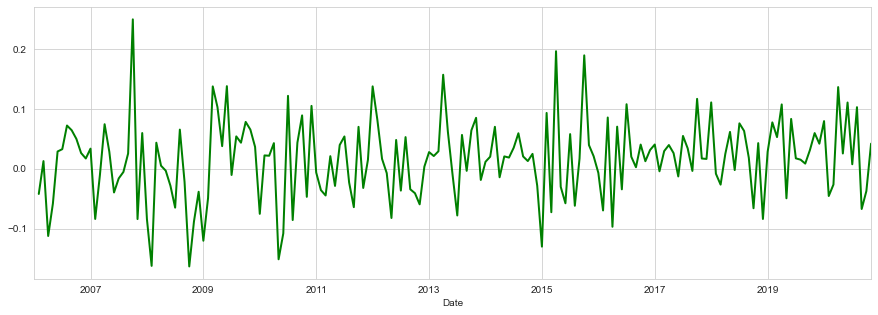

In [128]:
monthly_returns['MSFT Return'].plot(figsize=(15,5), color='green', lw=2)

### Yearly Returns DataFrame

In [129]:
yearly_returns = pd.DataFrame()

for tick in tickers:
    yearly_returns[tick + ' Return'] = tech_stocks[tick]['Adj Close'].resample('Y').ffill().pct_change()
    
#for tick in tickers2:
#    yearly_returns[tick + ' Return'] = top_indices[tick]['Adj Close'].resample('Y').ffill().pct_change()

<AxesSubplot:xlabel='Date'>

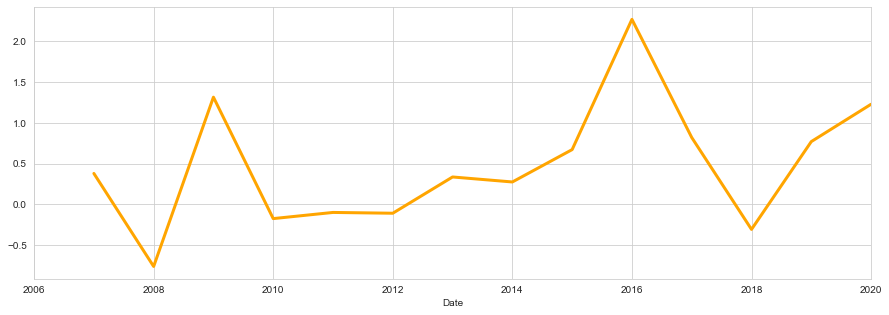

In [135]:
yearly_returns['NVDA Return'].plot(figsize=(15,5), color='orange', lw=3)

### Monthly Cumulative Returns
To calculate the cumulative returns we will use the `cumprod()` function.

Documentation: [pandas.DataFrame.cumprod()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumprod.html)

In [168]:
monthly_cumulative_returns = pd.DataFrame()

for tick in tickers:
    monthly_cumulative_returns[tick + ' Return'] = (monthly_returns[tick + ' Return'] + 1).cumprod()

### Yearly Cumulative Returns

In [ ]:
yearly_cumulative_returns = pd.DataFrame()

for tick in tickers:
    yearly_cumulative_returns[tick + ' Return'] = (yearly_returns[tick + ' Return'] + 1).cumprod()

### Bar Chart - Best Yearly Cumulative Returns in 2020

In [162]:
best_yearly_cum = yearly_cumulative_returns.loc['2020-12-31'].sort_values(ascending=False).head(10)
figure = px.bar(best_yearly_cum, title='Best Yearly Cumulative Returns in 2020', 
                labels={'value':'Yearly Cumulative Returns', 'index':'Stocks'})
figure.update_layout(showlegend=False)
figure.show()

### Bar Chart - Worst Yearly Cumulative Returns in 2020

In [159]:
best_yearly_cum = yearly_cumulative_returns.loc['2020-12-31'].sort_values(ascending=True).head(10)
figure = px.bar(best_yearly_cum, title='Best Yearly Cumulative Returns in 2020', 
                labels={'value':'Yearly Cumulative Returns', 'index':'Stocks'})
figure.update_layout(showlegend=False)
figure.show()

## 3.5 Stock Standard Deviation

Let's take a look at the standard deviation of the returns.

**[Standard Deviation](https://en.wikipedia.org/wiki/Standard_deviation):** Is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.

Standard deviation is the statistical measure of market volatility, measuring how widely prices are dispersed from the average price. If prices trade in a narrow trading range, the standard deviation will return a low value that indicates low volatility. Conversely, if prices swing wildly up and down, then standard deviation returns a high value that indicates high volatility.

**Basically, standard deviation rises as prices become more volatile. As price action calms, standard deviation heads lower.**

### Bar Chart - Daily Stocks Standard Deviation 

***Which stock would you classify as the riskiest over the entire time period?***
* Looking the daily returns the riskiest stocks are U, PLTR, STNE and SNOW. 

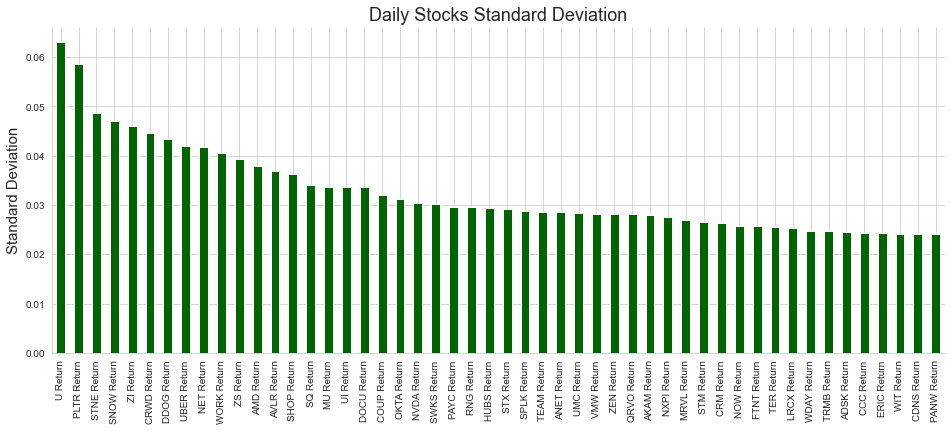

In [148]:
# We only show the Top 50
returns.std().sort_values(ascending=False).head(50).plot(kind='bar', color='darkgreen', figsize=(16,6))
plt.ylabel('Standard Deviation', fontsize=15)
plt.title('Daily Stocks Standard Deviation', fontsize=18)
sns.despine()

### Bar Chart - Yearly Stocks Standard Deviation 
If we plot the same data but with the yearly returns, the riskiest stocks are ZS, AMD, MU, UI and STX

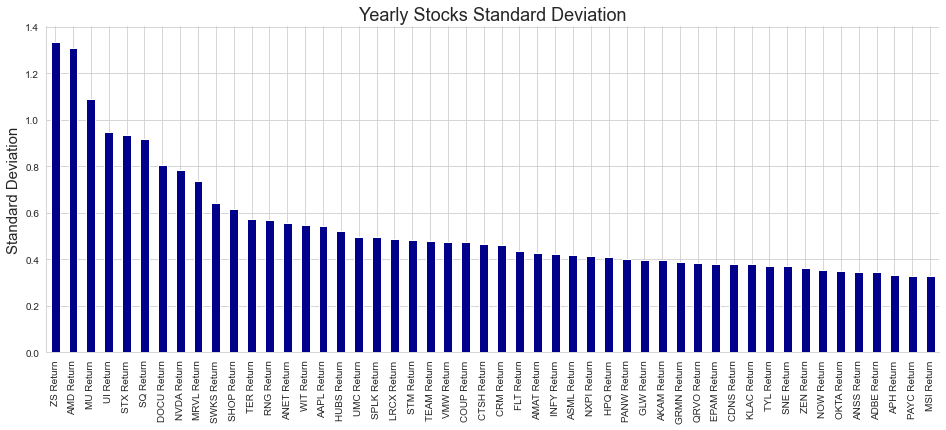

In [149]:
yearly_returns.std().sort_values(ascending=False).head(50).plot(kind='bar', color='darkblue', figsize=(16,6))
plt.ylabel('Standard Deviation', fontsize=15)
plt.title('Yearly Stocks Standard Deviation', fontsize=18)
sns.despine()

### Bar Chart - Most Volatile Stocks 2020

In [150]:
returns_2020 = returns.loc['2020-01-01':'2020-12-31'].std().head(10).sort_values(ascending=False)
figure = px.bar(returns_2020, title='Most Volatile Stocks 2020', 
                labels={'value':'Standard Deviation', 'index':'Stocks'})
figure.update_layout(showlegend=False)
figure.show()

### Dist Plot - 2020 NVDA, INTC, CRM and ASML Standard Deviation

[Text(0.5, 0, 'Standard Deviation'),
 Text(0, 0.5, 'Returns'),
 Text(0.5, 1.0, 'ASML')]

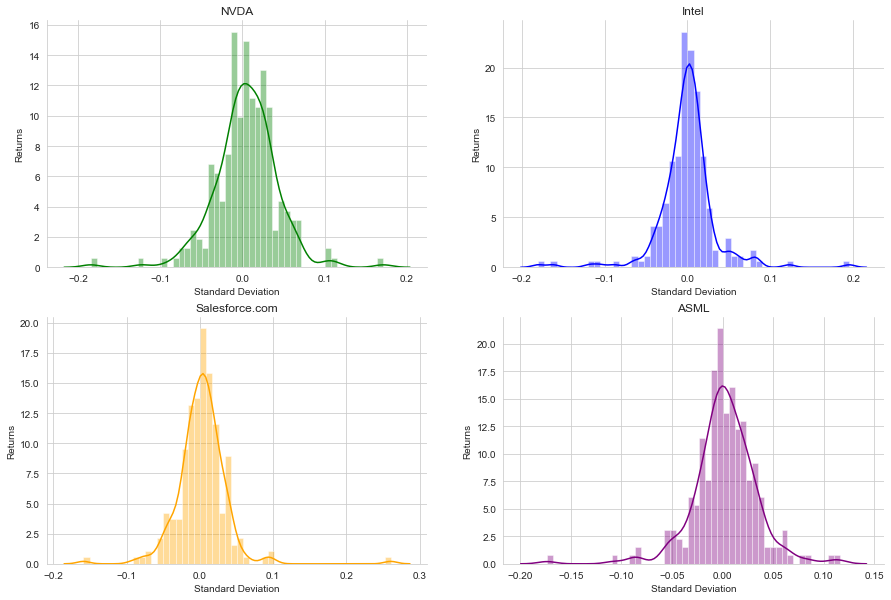

In [151]:
fig, axes = plt.subplots(2, 2,figsize=(15,10))
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['NVDA Return'], color='green', bins=50, ax=axes[0,0])
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['INTC Return'], color='blue', bins=50, ax=axes[0,1])
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['CRM Return'], color='orange', bins=50, ax=axes[1,0])
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['ASML Return'], color='purple', bins=50, ax=axes[1,1])
sns.despine()
axes[0,0].set(xlabel='Standard Deviation', ylabel='Returns', title='NVDA')
axes[0,1].set(xlabel='Standard Deviation', ylabel='Returns', title='Intel')
axes[1,0].set(xlabel='Standard Deviation', ylabel='Returns', title='Salesforce.com')
axes[1,1].set(xlabel='Standard Deviation', ylabel='Returns', title='ASML')

## 3.6 Stocks Pearson Correlation Matrix
We use the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#:~:text=In%20statistics%2C%20the%20Pearson%20correlation,between%20%2B1%20and%20%E2%88%921.) to examine the strength and direction of the linear relationship between two continuous variables.

The correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables. For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship. A correlation close to 0 indicates no linear relationship between the variables. 

The sign of the coefficient indicates the direction of the relationship. If both variables tend to increase or decrease together, the coefficient is positive, and the line that represents the correlation slopes upward. If one variable tends to increase as the other decreases, the coefficient is negative, and the line that represents the correlation slopes downward.

Let's create a heatmap of the correlation between the stocks Adj Close Price.

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}, xlabel='Stock Ticker', ylabel='Stock Ticker'>

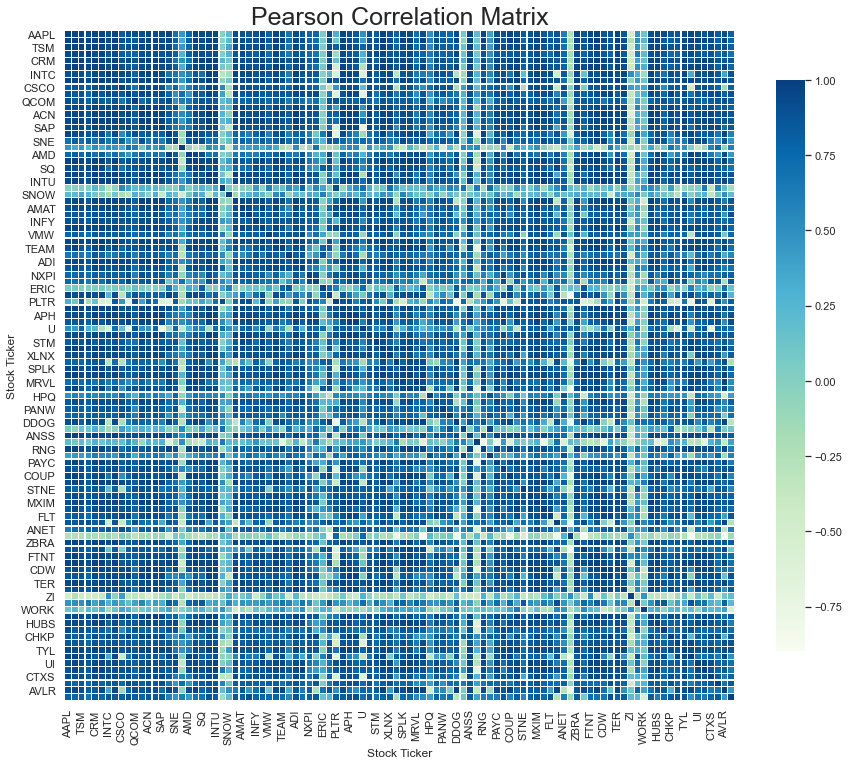

In [152]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(tech_stocks.xs(key='Adj Close', axis=1, level='Stock Info').corr(),linewidths=0.1,
            square=True,cmap="GnBu",linecolor='w', annot=False, cbar_kws={"shrink": .7})

<a id="ch4"></a>
# 4. Financial Charts
---
## 4.1 Line Charts

### Line Chart - Stock Returns of AAPL, SHOP, NVDA and CRM

[Text(0.5, 0, 'Years'),
 Text(0, 0.5, 'Cumulative Returns'),
 Text(0.5, 1.0, 'Salesforce')]

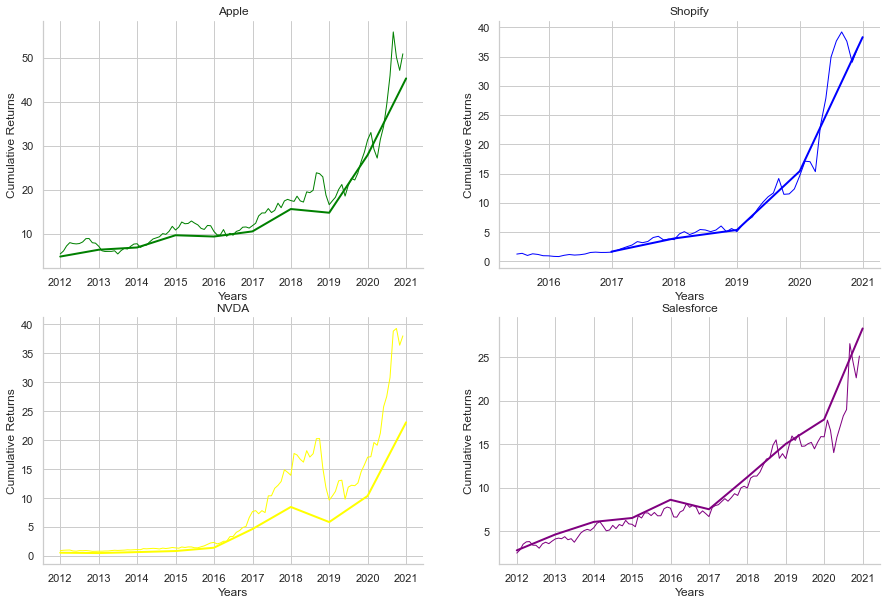

In [170]:
sns.set(style="whitegrid", font_scale=1)
fig, axes = plt.subplots(2, 2,figsize=(15,10))

# Yearly Returns
sns.lineplot(data=yearly_cumulative_returns.loc['2011-12-31':'2020-12-31']['AAPL Return'], color='green', lw=2, ax=axes[0,0])
sns.lineplot(data=yearly_cumulative_returns.loc['2011-12-31':'2020-12-31']['SHOP Return'], color='blue', lw=2, ax=axes[0,1])
sns.lineplot(data=yearly_cumulative_returns.loc['2011-12-31':'2020-12-31']['NVDA Return'], color='yellow', lw=2, ax=axes[1,0])
sns.lineplot(data=yearly_cumulative_returns.loc['2011-12-31':'2020-12-31']['CRM Return'], color='purple', lw=2, ax=axes[1,1])

# Monthly Returns
sns.lineplot(data=monthly_cumulative_returns.loc['2011-12-31':'2020-12-31']['AAPL Return'], color='green', lw=1, ax=axes[0,0])
sns.lineplot(data=monthly_cumulative_returns.loc['2011-12-31':'2020-12-31']['SHOP Return'], color='blue', lw=1, ax=axes[0,1])
sns.lineplot(data=monthly_cumulative_returns.loc['2011-12-31':'2020-12-31']['NVDA Return'], color='yellow', lw=1, ax=axes[1,0])
sns.lineplot(data=monthly_cumulative_returns.loc['2011-12-31':'2020-12-31']['CRM Return'], color='purple', lw=1, ax=axes[1,1])

sns.despine()

axes[0,0].set(xlabel='Years', ylabel='Cumulative Returns', title='Apple')
axes[0,1].set(xlabel='Years', ylabel='Cumulative Returns', title='Shopify')
axes[1,0].set(xlabel='Years', ylabel='Cumulative Returns', title='NVDA')
axes[1,1].set(xlabel='Years', ylabel='Cumulative Returns', title='Salesforce')

### Line Chart - Stock Returns of ERIC, IBM, CAJ and HPQ

[Text(0.5, 0, 'Years'),
 Text(0, 0.5, 'Cumulative Returns'),
 Text(0.5, 1.0, 'HP')]

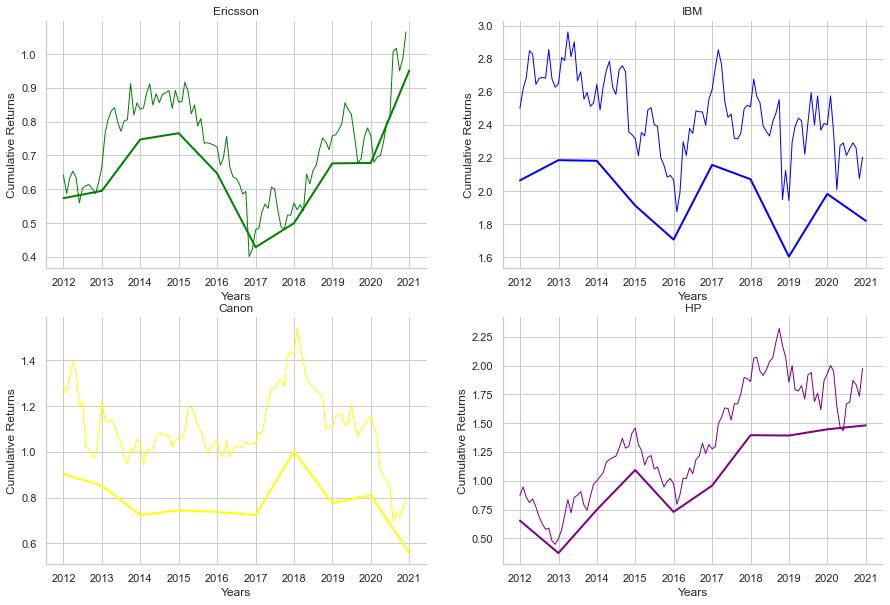

In [174]:
sns.set(style="whitegrid", font_scale=1)
fig, axes = plt.subplots(2, 2,figsize=(15,10))

# Yearly Returns
sns.lineplot(data=yearly_cumulative_returns.loc['2011-12-31':'2020-12-31']['ERIC Return'], color='green', lw=2, ax=axes[0,0])
sns.lineplot(data=yearly_cumulative_returns.loc['2011-12-31':'2020-12-31']['IBM Return'], color='blue', lw=2, ax=axes[0,1])
sns.lineplot(data=yearly_cumulative_returns.loc['2011-12-31':'2020-12-31']['CAJ Return'], color='yellow', lw=2, ax=axes[1,0])
sns.lineplot(data=yearly_cumulative_returns.loc['2011-12-31':'2020-12-31']['HPQ Return'], color='purple', lw=2, ax=axes[1,1])

# Monthly Returns
sns.lineplot(data=monthly_cumulative_returns.loc['2011-12-31':'2020-12-31']['ERIC Return'], color='green', lw=1, ax=axes[0,0])
sns.lineplot(data=monthly_cumulative_returns.loc['2011-12-31':'2020-12-31']['IBM Return'], color='blue', lw=1, ax=axes[0,1])
sns.lineplot(data=monthly_cumulative_returns.loc['2011-12-31':'2020-12-31']['CAJ Return'], color='yellow', lw=1, ax=axes[1,0])
sns.lineplot(data=monthly_cumulative_returns.loc['2011-12-31':'2020-12-31']['HPQ Return'], color='purple', lw=1, ax=axes[1,1])

sns.despine()

axes[0,0].set(xlabel='Years', ylabel='Cumulative Returns', title='Ericsson')
axes[0,1].set(xlabel='Years', ylabel='Cumulative Returns', title='IBM')
axes[1,0].set(xlabel='Years', ylabel='Cumulative Returns', title='Canon')
axes[1,1].set(xlabel='Years', ylabel='Cumulative Returns', title='HP')

### Line Chart - Microsoft Stock Price
You can interact with the charts by clicking and dragging.

In [179]:
tech_stocks['MSFT']['Adj Close'].loc['2010-11-01':'2020-09-30'].iplot(fill=True,colors=['green'])

### Line Chart - Apple Stock Price

In [178]:
tech_stocks['AAPL']['Adj Close'].loc['2010-11-01':'2020-09-30'].iplot(fill=True,colors=['blue'])

## 4.2 Histograms Charts

### Histograms - Stocks Returns
We can also use plotly to show histograms. In this case we are showing the return of the stocks with the highest volume in the tech sector from 2019 to 2020. You can interact with the charts by clicking and dragging.

* We can see that the behavior regarding the distribution in returns is quite similar between the 5 companies.
* In the majority the return is centered between -0.1 and 0.1.
* However, there are exceptions like PLTR.
* PLTR has a very strange returns distribution. This is probably because it is a very volatile stock. In fact, if you go to the bar chart that we did before, you can see that it is one of the stock with highest standard deviation.

Documentation:[Histograms in Python](https://plotly.com/python/histograms/)

In [182]:
fig = make_subplots(rows=3, cols=2)

trace0 = go.Histogram(x=returns.loc['2019-01-01':'2020-12-31']['AAPL Return'], nbinsx=50, name="AAPL")
trace1 = go.Histogram(x=returns.loc['2019-01-01':'2020-12-31']['PLTR Return'], nbinsx=50, name="PLTR")
trace2 = go.Histogram(x=returns.loc['2019-01-01':'2020-12-31']['AMD Return'], nbinsx=50, name="AMD")
trace3 = go.Histogram(x=returns.loc['2019-01-01':'2020-12-31']['INTC Return'], nbinsx=50, name="INTC")
trace4 = go.Histogram(x=returns.loc['2019-01-01':'2020-12-31']['MSFT Return'], nbinsx=50, name="MSFT")
trace5 = go.Histogram(x=returns.loc['2019-01-01':'2020-12-31']['CSCO Return'], nbinsx=50, name="CSCO")

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(title_text='Stocks Returns (2019 - 2020)')

fig.show()

## 4.3 Moving Averages Charts

### Simple Moving Averages - Shopify Stock Price
A [Simple Moving Average (SMA)](https://www.investopedia.com/terms/s/sma.asp) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range. Is a technical indicator that can aid in determining if an asset price will continue or if it will reverse a bull or bear trend.

Use `.ta_plot(study='sma')` to create a Simple Moving Averages plot of Shopify. You can interact with the charts by clicking and dragging.

* Shopify Inc. is a Canadian multinational e-commerce company headquartered in Ottawa, Ontario.
* Shopify offers online retailers a suite of services including payments, marketing, shipping and "customer engagement tools".
* The company reported that it had more than 1,000,000 businesses in approximately 175 countries using its platform as of June 2019. 
* The total gross merchandise volume exceeded `US$61` billion for calendar 2019.
* Since the coronavirus pandemic Shopify stock price has gone up almost `$550`, that is a `236%` return. 

In [190]:
tech_stocks['SHOP'].loc['2016-01-01':'2020-12-31']['Adj Close'].ta_plot(study='sma', periods=[13,21,55])

## 4.4 Candlestick Charts

### Candlestick Chart - AMD Stock Price

Documentation: [Candlestick Charts in Python](https://plotly.com/python/candlestick-charts/)

The candlestick chart is a style of financial chart describing open, high, low and close for a given x coordinate (most likely time). The boxes represent the spread between the open and close values and the lines represent the spread between the low and high values. Sample points where the close value is higher (lower) then the open value are called increasing (decreasing). By default, increasing candles are drawn in green whereas decreasing are drawn in red.

You can learn more about Candlestick Charts [here.](https://www.investopedia.com/trading/candlestick-charting-what-is-it/#:~:text=in%20candlestick%20charts.-,Candlestick%20Components,close%20of%20that%20day's%20trading.)

* AMD is an American multinational semiconductor company based in Santa Clara, California, that develops computer processors and related technologies for business and consumer markets.
* AMD has staged an amazing turnaround over the past several years, fueled by new products and improved profitability, therefore AMD stock has climbed as a result.

In [191]:
# AMD Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=tech_stocks['AMD'].index,
                open=tech_stocks['AMD']['Open'],
                high=tech_stocks['AMD']['High'],
                low=tech_stocks['AMD']['Low'], 
                close=tech_stocks['AMD']['Close'])
                ])

fig.update_layout(
    title='AMD Stock Price',
    yaxis_title='AMD Stock',
    shapes = [dict(
        x0='2009-01-20', x1='2009-01-20', y0=0, y1=1, xref='x', yref='paper', line_width=2),
             dict(
        x0='2007-12-01', x1='2007-12-01', y0=0, y1=1, xref='x', yref='paper', line_width=2)],
    annotations=[dict(
        x='2009-01-20', y=0.95, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='President Obama Took Office'), 
                 dict(
        x='2007-12-01', y=0.1, xref='x', yref='paper',
        showarrow=False, xanchor='right', text='Subprime Mortgage Crisis')]
)

fig.show()

## 4.5 Bollinger Band Charts

### Bollinger Band Chart - MSFT Stock Price
A [Bollinger Band](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-bands#:~:text=Bollinger%20Bands%20are%20envelopes%20plotted,Period%20and%20Standard%20Deviations%2C%20StdDev.) is a technical analysis tool defined by a set of trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of a security's price, but which can be adjusted to user preferences.

* When the bands tighten during a period of low volatility, it raises the likelihood of a sharp price move in either direction.
* When the bands separate by an unusual large amount, volatility increases and any existing trend may be ending.
* Prices have a tendency to bounce within the bands' envelope, touching one band then moving to the other band. You can use these swings to help identify potential profit targets.

Use `.ta_plot(study='boll')` to create a Bollinger Band Plot for Microsoft.

In [192]:
tech_stocks['MSFT'].loc['2010-01-01':'2020-01-01']['Adj Close'].ta_plot(study='boll',periods=14, title='Bollinger Bands')

## 4.6 OHLC Charts

### OHLC Charts - EPAM Stock Price
Documentation: [OHLC Charts in Python](https://plotly.com/python/ohlc-charts/)

The OHLC chart (for open, high, low and close) is a style of financial chart describing open, high, low and close values for a given x coordinate (most likely time). The tip of the lines represent the low and high values and the horizontal segments represent the open and close values. Sample points where the close value is higher (lower) then the open value are called increasing (decreasing). By default, increasing items are drawn in green whereas decreasing are drawn in red.

You can find more information [here.](https://www.investopedia.com/terms/o/ohlcchart.asp) 

<img src="http://www.saturn.network/blog/content/images/2019/01/ohcl.png" width="300" height="300"/>

In [194]:
# EPAM OHLC Chart
fig = go.Figure(data=go.Ohlc(x=tech_stocks['EPAM'].index,
                    open=tech_stocks['EPAM']['Open'],
                    high=tech_stocks['EPAM']['High'],
                    low=tech_stocks['EPAM']['Low'],
                    close=tech_stocks['EPAM']['Close']))

fig.update_layout(title='EPAM Stock Price', yaxis_title='EPAM Stock')

fig.show()

<a id="ch5"></a>
# 5. Predictions and Conclusion
---
## 5.1 Investment Recommendations

<a id="ch6"></a>
# 6. References
---

* [Yahoo Finance](https://finance.yahoo.com/) | Profile Stock Data
* [SEC EDGAR](https://www.sec.gov/edgar/searchedgar/companysearch.html) | Company Filings
* [NASDAQ](https://www.nasdaq.com/) | Historical Quotes
* [Financial Terms Dictionary](https://www.investopedia.com/financial-term-dictionary-4769738) | Comprehensive financial terms dictionary with over 13,000 finance and investment definitions.
* [Fidelity](https://fundresearch.fidelity.com/mutual-funds/summary/316390681) | Mutual Funds Examples

## Feedback
* **Your feedback is much appreciated**
* **<b><font color='green'>Please UPVOTE if you LIKE this notebook</font></b>**
* **Comment if you have any doubts or you found any errors in the notebook**